In [1]:
import math
import shutil
import joblib
import json
import pandas as pd

import sys 
sys.path.append('code/')

from input_data import data_reader
from error_terms import GaussianError, EVError
from simulation import MIP


In [2]:
DATA = joblib.load('data/example_data.joblib')
TT = joblib.load('data/example_tt.joblib')
PARAMS = json.load(open('data/example_parameters.json', 'r'))

In [3]:
DATA

,act_id,act_label,label,start_time,end_time,duration,feasible_start,feasible_end,location,loc_id,mode_travel,group,desired_start,desired_duration
0,1.0,home,dawn,0.000000,9.500000,9.500000,0,24,"(46.5356, 6.60019)",1,driving,dawn,0.000000,12.940332
1,2.0,work,work1,9.533333,13.500000,3.966667,5,23,"(46.5355, 6.59967)",0,driving,work,6.602686,10.470977
2,1.0,home,home,13.533333,15.166667,1.633333,0,24,"(46.5356, 6.60019)",1,driving,home,0.000000,12.940332
3,2.0,work,work2,15.200000,20.000000,4.800000,5,23,"(46.5355, 6.59967)",0,driving,work,6.602686,10.470977
4,8.0,leisure,leisure,20.466667,20.466667,0.000000,0,24,"(46.5355, 6.59967)",0,driving,leisure,16.005231,3.380537
5,1.0,home,dusk,20.500000,24.000000,3.500000,0,24,"(46.5356, 6.60019)",1,driving,dusk,0.000000,12.940332


In [4]:
TT

{'driving': {(46.5356, 6.60019): {(46.5356, 6.60019): 0,
   (46.5355, 6.59967): 0.0002777777777777778},
  (46.5355, 6.59967): {(46.5356, 6.60019): 0.0002777777777777778,
   (46.5355, 6.59967): 0}}}

In [7]:
PARAMS['work']

{'constant': 13.0838530926,
 'early': -0.618657816,
 'late': -0.3384943975,
 'short': -0.9319615942,
 'long': -1.223996357,
 'travel_time': -1}

In [10]:
UTILITY_PARAMS = {
    'error_w': GaussianError(),
    'error_x': GaussianError(),
    'error_d': GaussianError(),
    'error_z': GaussianError(),
    'error_ev': EVError()
    }

print(UTILITY_PARAMS["error_ev"].loc, UTILITY_PARAMS["error_ev"].scale)

0 1


In [11]:
N_ITER = 100

dataset = data_reader(DATA,PARAMS)
new_simulation = MIP(dataset, UTILITY_PARAMS,TT)

results = new_simulation.run(n_iter = N_ITER, verbose = 10)

Starting simulation: 100 iterations.
-----------------------------------------
Starting iteration 10/100.
Iteration 10 complete. Iteration runtime: 00:00:00. Time elapsed: 00:00:12.
Starting iteration 20/100.
Iteration 20 complete. Iteration runtime: 00:00:00. Time elapsed: 00:00:20.
Starting iteration 30/100.
Iteration 30 complete. Iteration runtime: 00:00:00. Time elapsed: 00:00:33.
Starting iteration 40/100.
Iteration 40 complete. Iteration runtime: 00:00:00. Time elapsed: 00:00:41.
Starting iteration 50/100.
Iteration 50 complete. Iteration runtime: 00:00:01. Time elapsed: 00:00:54.
Starting iteration 60/100.
Iteration 60 complete. Iteration runtime: 00:00:00. Time elapsed: 00:01:08.
Starting iteration 70/100.
Iteration 70 complete. Iteration runtime: 00:00:00. Time elapsed: 00:01:16.
Starting iteration 80/100.
Iteration 80 complete. Iteration runtime: 00:00:00. Time elapsed: 00:01:26.
Starting iteration 90/100.
Iteration 90 complete. Iteration runtime: 00:00:00. Time elapsed: 00:0

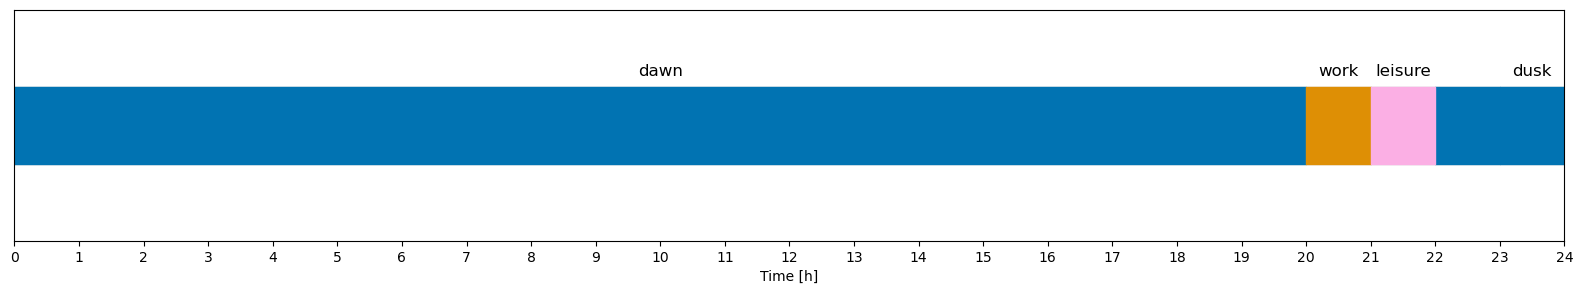

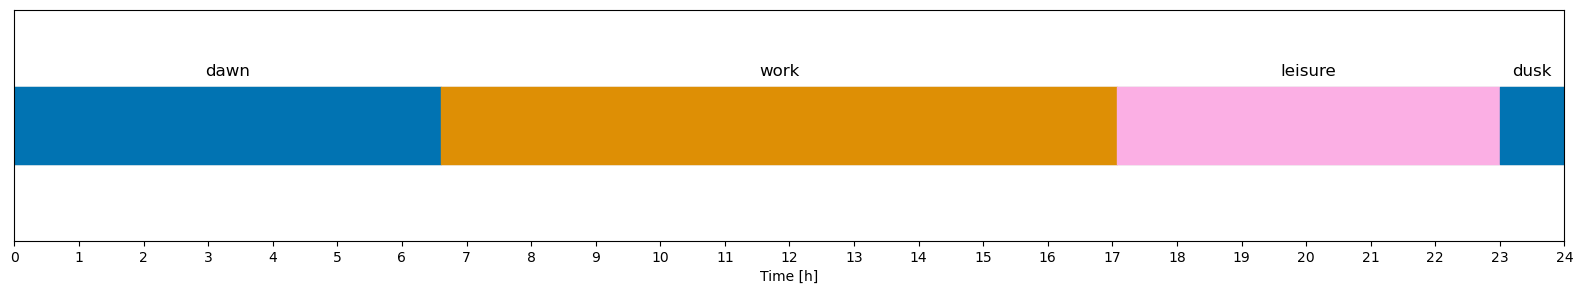

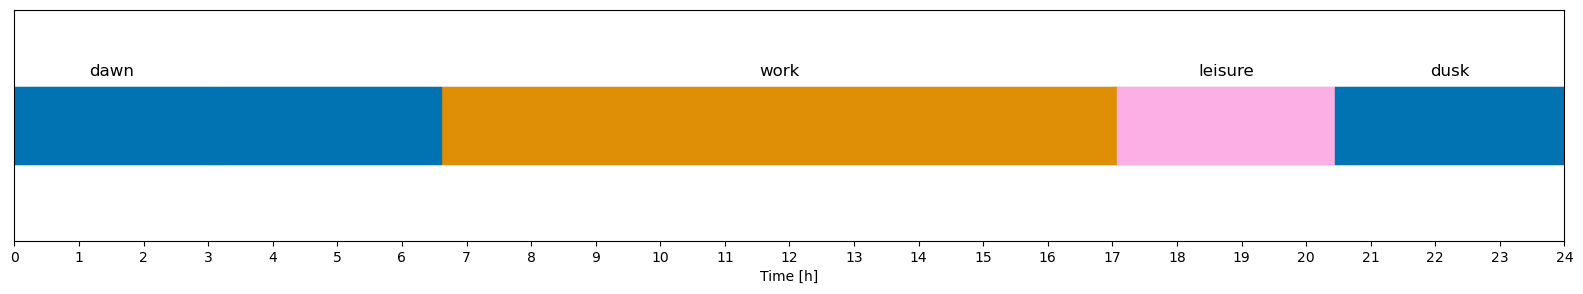

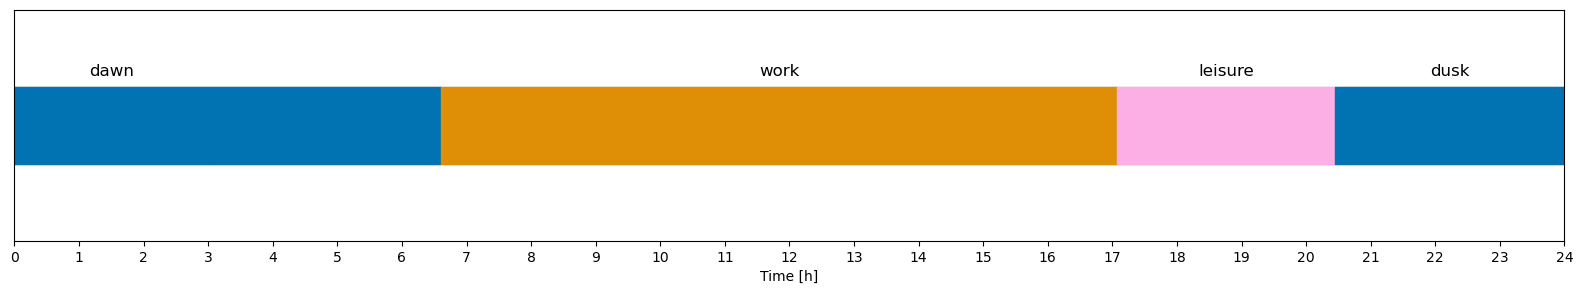

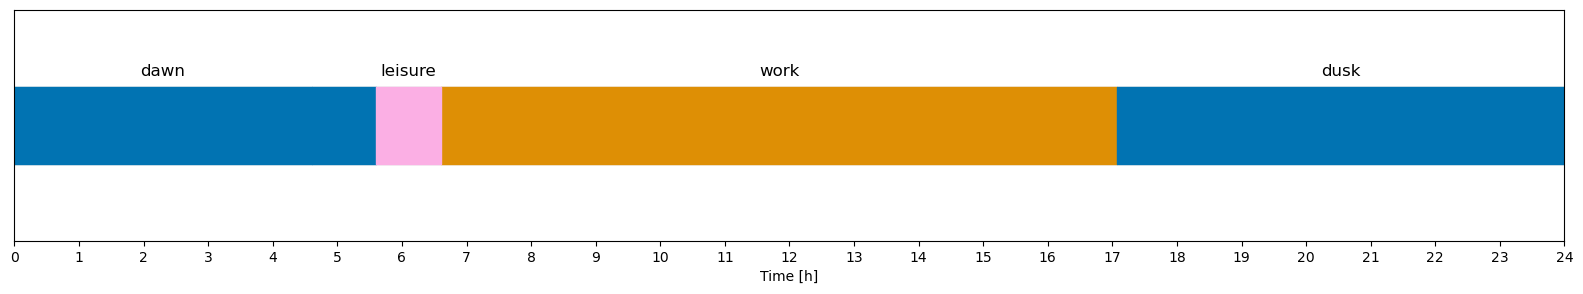

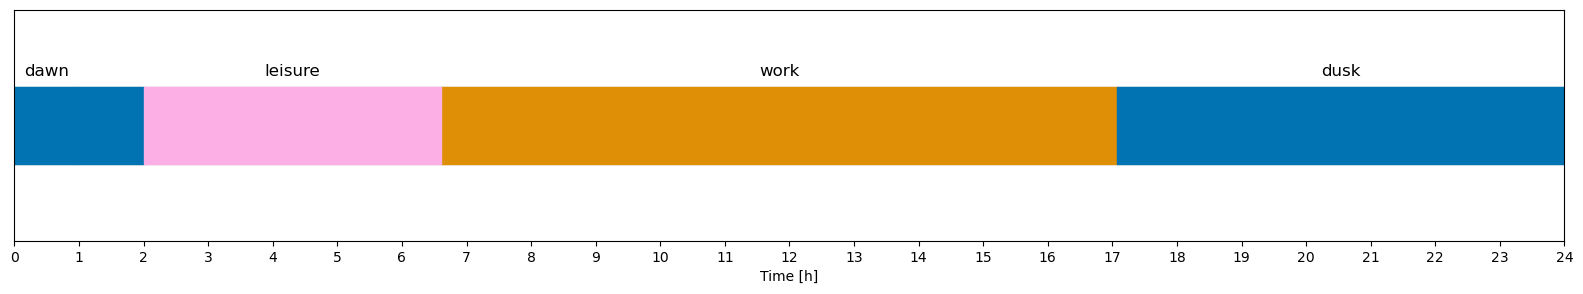

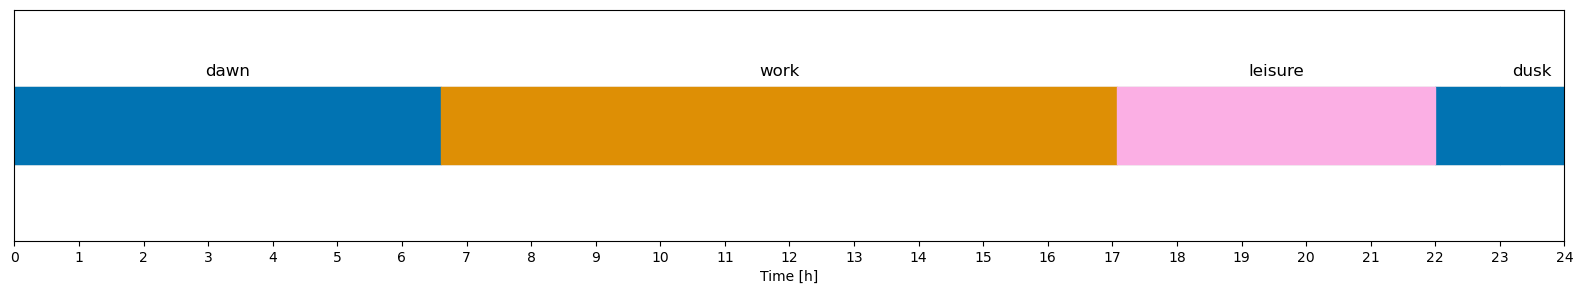

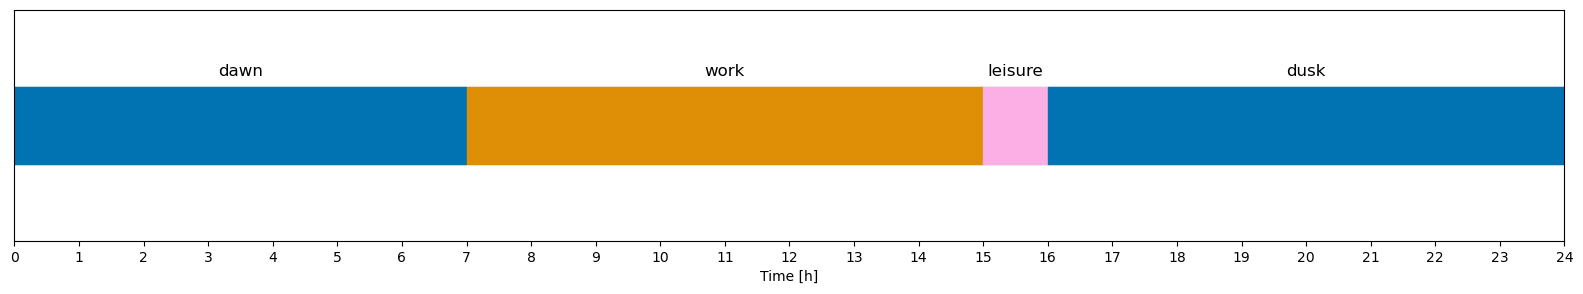

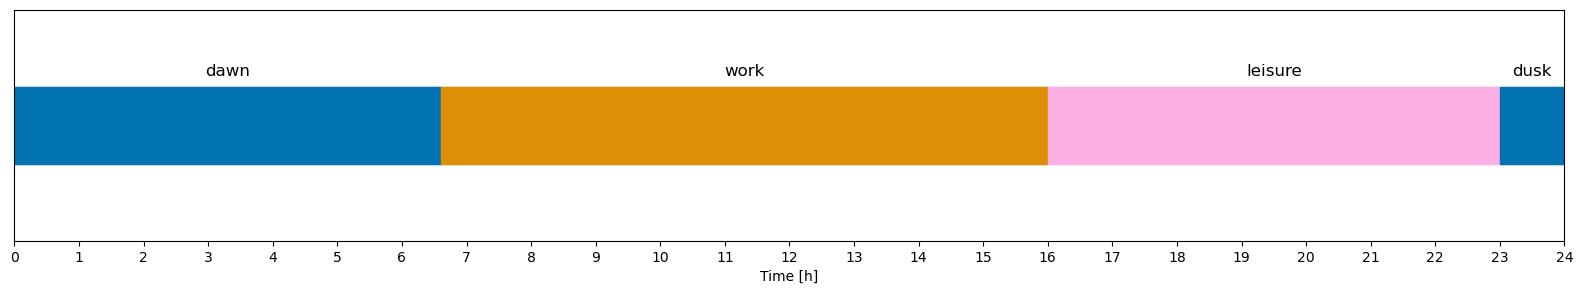

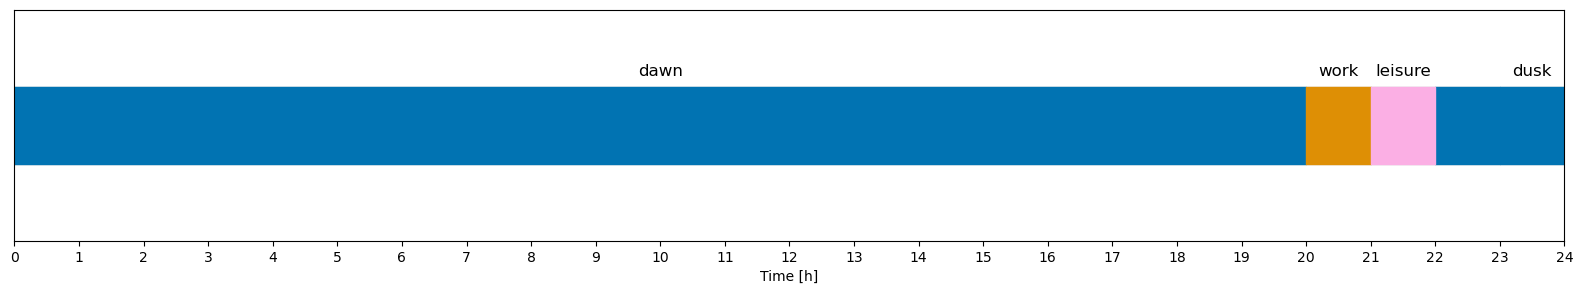

In [12]:
results.plot(plot_every=10)

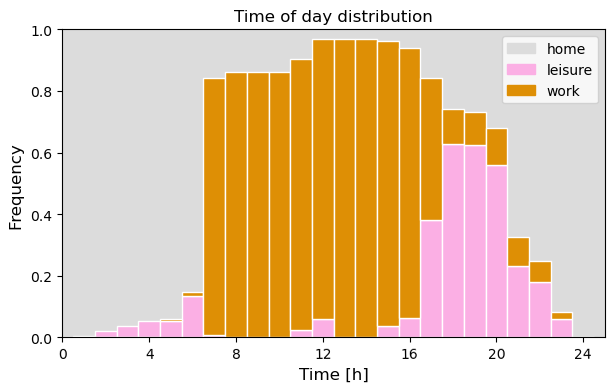

In [13]:
results.plot_distribution(figure_size= [7,4])

In [14]:
results.compute_statistics(['home', 'work', 'leisure'], save = False)

Summary of collected statistics:
------------------------------------------------

Total number of schedules: 100
Proportion of out-of-home schedules: 93.00 %
Average time spent out-of-home: 13.10, CI: [12.956,13.279] hours
Average number of out-of-home activities: 1.98, CI: [1.968, 1.989]
------------------------------------------------

Average duration of each activity:
Home: 10.88, CI: [10.702, 11.017] hours
Work: 10.06, CI: [9.970, 10.188] hours
Leisure: 3.18, CI: [3.077, 3.312] hours
------------------------------------------------



In [ ]:
T